In [12]:
import os
import pickle
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.signal import find_peaks

In [13]:
with open("S10_af_time_series.pkl", "rb") as f:
    data = pickle.load(f)

afs = data["data"]
metas = pd.read_excel("S11_af_meta.xlsx")
weld_end = pd.read_excel("S12_1_af_weld_end.xlsx")

In [14]:
OUT_DIR = "S12_2"
os.makedirs(OUT_DIR, exist_ok=True)

In [15]:
metas

,sample_no,DynoWare,Path,Filename,Config ID,Setup ID,Manipulated,Filename 1,Filename 2,Date,...,Delay time [s],Cycle time [s],Cycles,Samples per channel,Cycle interval,Cycle No,filename,R,D,W
0,1,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 1.dwd,Sample 1.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,0,0,1,18001,0,1,Sample 1.csv,1400,10,60
1,2,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 2.dwd,Sample 2.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,0,0,1,18001,0,1,Sample 2.csv,1400,15,60
2,3,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 3.dwd,Sample 3.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,0,0,1,18001,0,1,Sample 3.csv,1400,20,60
3,4,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 4.dwd,Sample 4.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,0,0,1,18001,0,1,Sample 4.csv,1400,10,70
4,5,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 5.dwd,Sample 5.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,0,0,1,18001,0,1,Sample 5.csv,1400,15,70
5,6,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 6.dwd,Sample 6.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,0,0,1,18001,0,1,Sample 6.csv,1400,20,70
6,7,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 7.dwd,Sample 7.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,0,0,1,18001,0,1,Sample 7.csv,1400,10,80
7,8,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 8.dwd,Sample 8.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,0,0,1,18001,0,1,Sample 8.csv,1400,15,80
8,9,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 9.dwd,Sample 9.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,0,0,1,18001,0,1,Sample 9.csv,1400,20,80
9,10,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 10.dwd,Sample 10.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,0,0,1,18001,0,1,Sample 10.csv,1500,10,60


In [16]:
weld_end

,sample_no,drop_idx_chosen,drop_threshold,weld_time_end_idx,weld_time_end
0,1,-1,-3,16856,168.56
1,2,-1,-3,17262,172.62
2,3,-1,-3,17824,178.24
3,4,-1,-3,14807,148.07
4,5,-1,-3,15388,153.88
5,6,-1,-3,15509,155.09
6,7,-1,-3,13199,131.99
7,8,-1,-3,13840,138.40
8,9,-1,-3,14537,145.37
9,10,-1,-3,16532,165.32


In [17]:
afs

,Time,Mz,Fz,Fy,Fx,sample_no
0,0.00,0.297328,0.044294,0.006714,0.004425,1
1,0.01,0.061471,0.029864,0.000741,-0.000011,1
2,0.02,0.296021,0.044425,0.006616,0.004381,1
3,0.03,0.061907,0.029253,0.000708,0.000011,1
4,0.04,0.301252,0.043509,0.006801,0.004469,1
...,...,...,...,...,...,...
972049,179.96,12.385800,0.244707,-0.010027,-0.015117,9
972050,179.97,12.677900,0.262844,-0.002616,-0.009668,9
972051,179.98,12.389700,0.245361,-0.010005,-0.015063,9
972052,179.99,12.678700,0.263192,-0.002638,-0.009635,9


## Prototype

Sample No: 1, D: 10s, W: 60 mm/min
Weld Time: 130.0s
time_start: 28.560000000000002s, time_end: 38.56s
time_start_idx: 2856, time_end_idx: 3856
Dwell Time (actual): 10.0s
[2464 2794 2862 2978 4283]


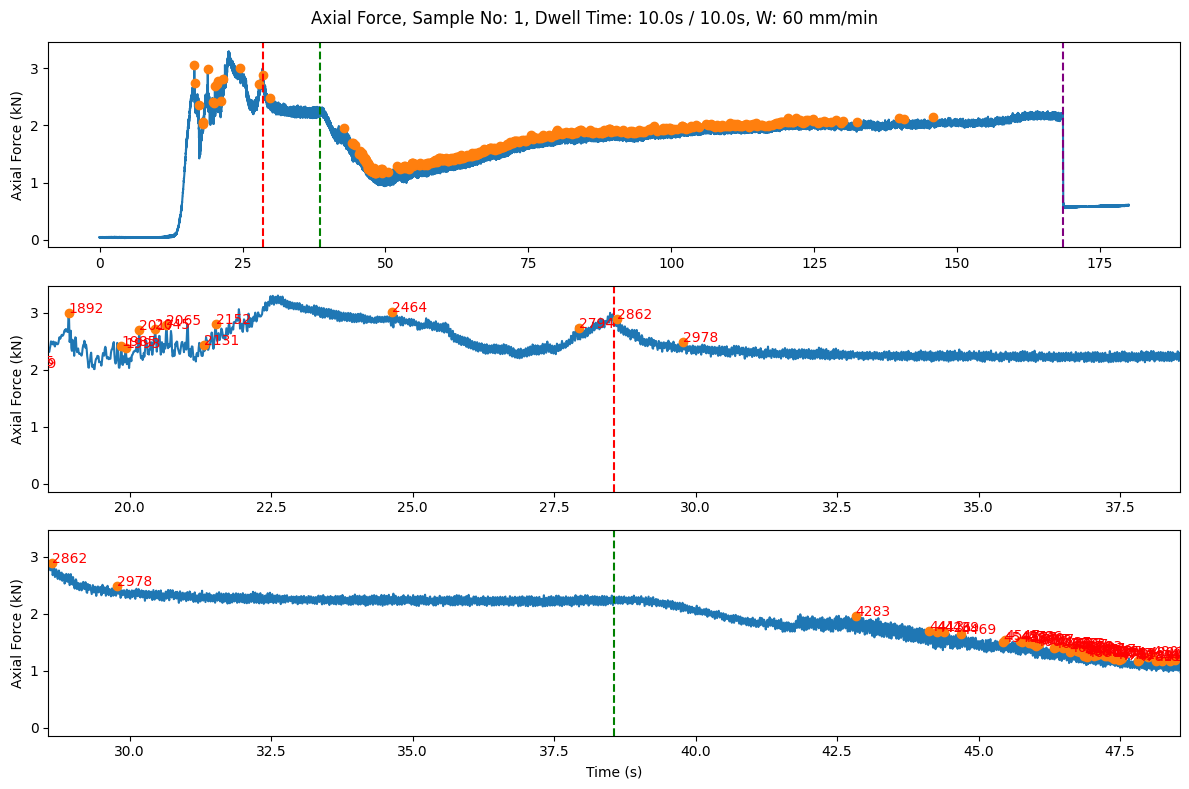

In [18]:
sample_no = 1
idx_start_chosen = None
idx_end_chosen = None
threshold = 0.1
peak_condition = dict(height=(1, None), threshold=(threshold, None))
zoom_level=1

# Extract relevant data
dwell_time = metas.loc[metas["sample_no"] == sample_no, "D"].values[0]
# sampling_rate = metas.loc[
#     metas["sample_no"] == sample_no, "Sampling rate [Hz]"
# ].values[0]
_weld_speed = metas.loc[metas["sample_no"] == sample_no, "W"].values[0]  # mm/min
weld_speed = _weld_speed / 60  # Convert to mm/s
af = afs.loc[afs["sample_no"] == sample_no].reset_index(drop=True)
af.set_index("Time", inplace=True)
weld_time_end = weld_end.loc[
    weld_end["sample_no"] == sample_no, "weld_time_end"
].values[0]

# Weld time is calculated from the speed and length of sample which is 130 mm
weld_time = 130 / weld_speed

# Estimate dwell time checkpoints
dwell_time_end_approx = weld_time_end - weld_time

# Find peaks in axial force data
peak_idxes, props = find_peaks(af["Fz"], **peak_condition)

# Choose dwell time end based on peak indexes
if idx_end_chosen is None:  # Auto select based on dwell time
    dwell_time_end_idx = af.index.get_indexer(
        [dwell_time_end_approx], method="nearest"
    )[0]
else:
    if idx_end_chosen < 0:
        raise ValueError("idx_end_chosen must be non-negative integer.")
    else:
        dwell_time_end_idx = idx_end_chosen
dwell_time_end = af.index[dwell_time_end_idx]

# Choose dwell time start
if idx_start_chosen is None:  # Auto select based on dwell time
    dwell_time_start = dwell_time_end - dwell_time
    dwell_time_start_idx = af.index.get_indexer(
        [dwell_time_start], method="nearest"
    )[0]
else:  # Manual select
    if idx_start_chosen < 0:
        raise ValueError("idx_start_chosen must be non-negative integer.")
    elif idx_start_chosen <= 10:  # Select from peak indexes
        dwell_time_start_idx = peak_idxes[idx_start_chosen]
        dwell_time_start = af.index[dwell_time_start_idx]
    else:  # Directly specify index
        dwell_time_start_idx = idx_start_chosen
        dwell_time_start = af.index[dwell_time_start_idx]

# Actual dwell time
dwell_time_actual = dwell_time_end - dwell_time_start

# Summary printout
print(
    f"Sample No: {sample_no}, D: {dwell_time}s, W: {_weld_speed} mm/min"
)
print(f"Weld Time: {weld_time}s")
print(f"time_start: {dwell_time_start}s, time_end: {dwell_time_end}s")
print(f"time_start_idx: {dwell_time_start_idx}, time_end_idx: {dwell_time_end_idx}")
print(f"Dwell Time (actual): {dwell_time_actual}s")

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(12, 8))
axes[0].plot(af.index, af["Fz"], label="Axial Force (Fz)")
axes[0].plot(af.index[peak_idxes], af["Fz"].iloc[peak_idxes], "o", label="Peaks")
axes[0].axvline(
    x=dwell_time_start, color="red", linestyle="--", label="Dwell Start"
)
axes[0].axvline(x=dwell_time_end, color="green", linestyle="--", label="Dwell End")
axes[0].axvline(x=weld_time_end, color="purple", linestyle="--", label="Weld Stop")
axes[0].set_ylabel("Axial Force (kN)")

# Zoomed-in plot around dwell time
axes[1].plot(af.index, af["Fz"], label="Axial Force (Fz)")
axes[1].axvline(
    x=dwell_time_start, color="red", linestyle="--", label="Dwell Start"
)
xlim_start = [dwell_time_start - dwell_time * zoom_level, dwell_time_start + dwell_time * zoom_level]
axes[1].set_xlim(xlim_start)
axes[1].plot(af.index[peak_idxes], af["Fz"].iloc[peak_idxes], "o", label="Peaks")
for peak_idx in peak_idxes:
    axes[1].text(
        af.index[peak_idx],
        af["Fz"].iloc[peak_idx],
        str(peak_idx),
        color="red",
        clip_on=True,
    )
axes[1].set_ylabel("Axial Force (kN)")

# Zoomed-in plot around dwell time
axes[2].plot(af.index, af["Fz"], label="Axial Force (Fz)")
axes[2].axvline(x=dwell_time_end, color="green", linestyle="--", label="Dwell End")
xlim_end = [dwell_time_end - dwell_time * zoom_level, dwell_time_end + dwell_time * zoom_level]
axes[2].set_xlim(xlim_end)
axes[2].plot(af.index[peak_idxes], af["Fz"].iloc[peak_idxes], "o", label="Peaks")
for peak_idx in peak_idxes:
    axes[2].text(
        af.index[peak_idx],
        af["Fz"].iloc[peak_idx],
        str(peak_idx),
        color="red",
        clip_on=True,
    )
axes[2].set_ylabel("Axial Force (kN)")
axes[2].set_xlabel("Time (s)")


xlim_all = [dwell_time_start - dwell_time * 0.5, dwell_time_end + dwell_time * 0.5]
filt = (af.index[peak_idxes] > xlim_all[0]) & (af.index[peak_idxes] < xlim_all[1])
peak_idxes_zoomed = peak_idxes[filt]
print(peak_idxes_zoomed)

fig.suptitle(
    f"Axial Force, Sample No: {sample_no}, Dwell Time: {dwell_time:.1f}s / {dwell_time_actual:.1f}s, W: {_weld_speed} mm/min"
)
fig.tight_layout()



## Function

In [19]:
def peak_detection(
    sample_no, threshold, idx_start_chosen, idx_end_chosen, file_prefix="S12_2_peak", zoom_level=1
):
    # sample_no = 1
    # idx_start_chosen = None
    # idx_end_chosen = None
    # threshold = 0.1
    # zoom_level=1
    peak_condition = dict(height=(1, None), threshold=(threshold, None))

    # Extract relevant data
    dwell_time = metas.loc[metas["sample_no"] == sample_no, "D"].values[0]
    # sampling_rate = metas.loc[
    #     metas["sample_no"] == sample_no, "Sampling rate [Hz]"
    # ].values[0]
    _weld_speed = metas.loc[metas["sample_no"] == sample_no, "W"].values[0]  # mm/min
    weld_speed = _weld_speed / 60  # Convert to mm/s
    af = afs.loc[afs["sample_no"] == sample_no].reset_index(drop=True)
    af.set_index("Time", inplace=True)
    weld_time_end = weld_end.loc[
        weld_end["sample_no"] == sample_no, "weld_time_end"
    ].values[0]

    # Weld time is calculated from the speed and length of sample which is 130 mm
    weld_time = (130) / weld_speed

    # Estimate dwell time checkpoints
    dwell_time_end_approx = weld_time_end - weld_time

    # Find peaks in axial force data
    peak_idxes, props = find_peaks(af["Fz"], **peak_condition)

    # Choose dwell time end based on peak indexes
    if idx_end_chosen is None:  # Auto select based on dwell time
        dwell_time_end_idx = af.index.get_indexer(
            [dwell_time_end_approx], method="nearest"
        )[0]
    else:
        if idx_end_chosen < 0:
            raise ValueError("idx_end_chosen must be non-negative integer.")
        else:
            dwell_time_end_idx = idx_end_chosen
    dwell_time_end = af.index[dwell_time_end_idx]

    # Choose dwell time start
    if idx_start_chosen is None:  # Auto select based on dwell time
        dwell_time_start = dwell_time_end - dwell_time
        dwell_time_start_idx = af.index.get_indexer(
            [dwell_time_start], method="nearest"
        )[0]
    else:  # Manual select
        if idx_start_chosen < 0:
            raise ValueError("idx_start_chosen must be non-negative integer.")
        elif idx_start_chosen <= 10:  # Select from peak indexes
            dwell_time_start_idx = peak_idxes[idx_start_chosen]
            dwell_time_start = af.index[dwell_time_start_idx]
        else:  # Directly specify index
            dwell_time_start_idx = idx_start_chosen
            dwell_time_start = af.index[dwell_time_start_idx]

    # Actual dwell time
    dwell_time_actual = dwell_time_end - dwell_time_start

    # Plotting
    fig, axes = plt.subplots(3, 1, figsize=(12, 8))
    axes[0].plot(af.index, af["Fz"], label="Axial Force (Fz)")
    axes[0].plot(af.index[peak_idxes], af["Fz"].iloc[peak_idxes], "o", label="Peaks")
    axes[0].axvline(
        x=dwell_time_start, color="red", linestyle="--", label="Dwell Start"
    )
    axes[0].axvline(x=dwell_time_end, color="green", linestyle="--", label="Dwell End")
    axes[0].axvline(x=weld_time_end, color="purple", linestyle="--", label="Weld Stop")
    axes[0].set_ylabel("Axial Force (kN)")

    # Zoomed-in plot around dwell time
    axes[1].plot(af.index, af["Fz"], label="Axial Force (Fz)")
    axes[1].axvline(
        x=dwell_time_start, color="red", linestyle="--", label="Dwell Start"
    )
    xlim_start = [dwell_time_start - dwell_time * zoom_level, dwell_time_start + dwell_time * zoom_level]
    axes[1].set_xlim(xlim_start)
    axes[1].plot(af.index[peak_idxes], af["Fz"].iloc[peak_idxes], "o", label="Peaks")
    for peak_idx in peak_idxes:
        axes[1].text(
            af.index[peak_idx],
            af["Fz"].iloc[peak_idx],
            str(peak_idx),
            color="red",
            clip_on=True,
        )
    axes[1].set_ylabel("Axial Force (kN)")

    # Zoomed-in plot around dwell time
    axes[2].plot(af.index, af["Fz"], label="Axial Force (Fz)")
    axes[2].axvline(x=dwell_time_end, color="green", linestyle="--", label="Dwell End")
    xlim_end = [dwell_time_end - dwell_time * zoom_level, dwell_time_end + dwell_time * zoom_level]
    axes[2].set_xlim(xlim_end)
    axes[2].plot(af.index[peak_idxes], af["Fz"].iloc[peak_idxes], "o", label="Peaks")
    for peak_idx in peak_idxes:
        axes[2].text(
            af.index[peak_idx],
            af["Fz"].iloc[peak_idx],
            str(peak_idx),
            color="red",
            clip_on=True,
        )
    axes[2].set_ylabel("Axial Force (kN)")
    axes[2].set_xlabel("Time (s)")


    xlim_all = [dwell_time_start - dwell_time * 0.5, dwell_time_end + dwell_time * 0.5]
    filt = (af.index[peak_idxes] > xlim_all[0]) & (af.index[peak_idxes] < xlim_all[1])
    peak_idxes_zoomed = peak_idxes[filt]
    print(peak_idxes_zoomed)

    fig.suptitle(
        f"Axial Force, Sample No: {sample_no}, Dwell Time: {dwell_time:.1f}s / {dwell_time_actual:.1f}s, W: {_weld_speed} mm/min"
    )
    fig.tight_layout()
    fig.savefig(f"{OUT_DIR}/{file_prefix}_sample_{sample_no}.png", dpi=300, bbox_inches="tight")
    plt.close(fig)

    return dict(
        dwell_time_start=dwell_time_start,
        dwell_time_end=dwell_time_end,
        dwell_time_start_idx=dwell_time_start_idx,
        dwell_time_end_idx=dwell_time_end_idx,
        dwell_time_actual=dwell_time_actual,
    )

In [20]:
default_idx_start_chosen = None
default_idx_end_chosen = None
default_threshold = 0.1
default_zoom_level = 1

_params = []
for sample_no in metas["sample_no"].unique():
    _params.append(
        dict(
            sample_no=sample_no,
            idx_start_chosen=default_idx_start_chosen,
            idx_end_chosen=default_idx_end_chosen,
            threshold=default_threshold,
            zoom_level=default_zoom_level,
        )
    )
params = pd.DataFrame.from_dict(_params)
display(params)

,sample_no,idx_start_chosen,idx_end_chosen,threshold,zoom_level
0,1,None,None,0.1,1
1,2,None,None,0.1,1
2,3,None,None,0.1,1
3,4,None,None,0.1,1
4,5,None,None,0.1,1
5,6,None,None,0.1,1
6,7,None,None,0.1,1
7,8,None,None,0.1,1
8,9,None,None,0.1,1
9,10,None,None,0.1,1


## Override parameters

In [21]:
# Override parameters for specific samples if needed
# Example: dict(sample_no=1, idx_start_chosen=8, idx_end_chosen=None, threshold=0.1)

override = [
    # dict(sample_no=4, idx_end_chosen=2624),
]

for ov in override:
    for key, value in ov.items():
        if key != "sample_no":
            params.loc[params["sample_no"] == ov["sample_no"], key] = value

display(params)

,sample_no,idx_start_chosen,idx_end_chosen,threshold,zoom_level
0,1,None,None,0.1,1
1,2,None,None,0.1,1
2,3,None,None,0.1,1
3,4,None,None,0.1,1
4,5,None,None,0.1,1
5,6,None,None,0.1,1
6,7,None,None,0.1,1
7,8,None,None,0.1,1
8,9,None,None,0.1,1
9,10,None,None,0.1,1


In [22]:
reses = []
for param in params.to_dict(orient="records")[:]:
    print(param)
    res = peak_detection(**param)
    res = {**param, **res}
    reses.append(res)
    print("----------")

dfpeak = pd.DataFrame.from_dict(reses)

{'sample_no': 1, 'idx_start_chosen': None, 'idx_end_chosen': None, 'threshold': 0.1, 'zoom_level': 1}
[2464 2794 2862 2978 4283]
----------
{'sample_no': 2, 'idx_start_chosen': None, 'idx_end_chosen': None, 'threshold': 0.1, 'zoom_level': 1}
[2814 2848 2874 2934 3024 3688 3718 4206 4223 4236 4240 4253 4283 4296
 4313 4343 4373 4403 4416 4429 4433 4442 4446 4459 4793 4853 4917 4919
 4943 4966 4973 5003]
----------
{'sample_no': 3, 'idx_start_chosen': None, 'idx_end_chosen': None, 'threshold': 0.1, 'zoom_level': 1}
[1862 2073 2103 2605 2797 2827 2883 2973 3123 3423 3796 3916 4040 4666
 5231 5265 5295 5325 5781]
----------
{'sample_no': 4, 'idx_start_chosen': None, 'idx_end_chosen': None, 'threshold': 0.1, 'zoom_level': 1}
[2466 2624 2650 2654 2680 2684 2710 2954 2984 3134 3284 3863 4149]
----------
{'sample_no': 5, 'idx_start_chosen': None, 'idx_end_chosen': None, 'threshold': 0.1, 'zoom_level': 1}
[2137 2145 2203 2207 2216 2319 2409 2413 2443 2513 2663 2730 2752 2773
 2777 2889 2893 308

In [23]:
dfpeak.to_excel("S12_2_af_peak.xlsx", index=False)